<a href="https://colab.research.google.com/github/kladrillono/MLA_KEL/blob/main/FinalProject_Classification_KEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Final Project - Classification**

Kendall Ladrillono

# Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports for Specific Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

ROC Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

Confusion Matrix Function

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

Reading the Data Set

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/fertility_Diagnosis.csv')

In [ ]:
df.head(5)

,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [ ]:
df.rename(columns={'-0.33':'season', '0.69':'age', '0':'childhood_diseases', '1':'accidents_trauma', '1.1':'surgeries', '0.1':'high_fevers', '0.8':'alcohol_frequency', '0.2':'smoking_habit', '0.88':'num_hrs_sitting_per_day', 'N':'diagnosis'}, inplace=True)

In [ ]:
df.head(5)

,season,age,childhood_diseases,accidents_trauma,surgeries,high_fevers,alcohol_frequency,smoking_habit,num_hrs_sitting_per_day,diagnosis
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [ ]:
df.sample(5)

,season,age,childhood_diseases,accidents_trauma,surgeries,high_fevers,alcohol_frequency,smoking_habit,num_hrs_sitting_per_day,diagnosis
89,-0.33,0.81,1,1,1,1,0.8,-1,0.38,N
74,-1.00,0.78,1,0,1,1,1.0,1,0.25,N
92,0.33,0.75,1,0,1,0,0.8,-1,0.44,O
58,1.00,0.58,0,0,0,1,0.8,1,0.44,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O


In [ ]:
df.describe()

,season,age,childhood_diseases,accidents_trauma,surgeries,high_fevers,alcohol_frequency,smoking_habit,num_hrs_sitting_per_day
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

season                     float64
age                        float64
childhood_diseases           int64
accidents_trauma             int64
surgeries                    int64
high_fevers                  int64
alcohol_frequency          float64
smoking_habit                int64
num_hrs_sitting_per_day    float64
diagnosis                   object
dtype: object

Recoding the output variable 'Diagnosis' from N=normal/O=abnormal to 1 and O.

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "N" else 0)

In [ ]:
df.diagnosis.groupby(df.diagnosis).count()

diagnosis
0    12
1    87
Name: diagnosis, dtype: int64

In [ ]:
df.corr()

,season,age,childhood_diseases,accidents_trauma,surgeries,high_fevers,alcohol_frequency,smoking_habit,num_hrs_sitting_per_day,diagnosis
season,1.000000,0.066010,-0.191464,-0.093313,-0.003091,-0.223105,-0.041934,-0.026732,-0.011239,-0.191464
age,0.066010,1.000000,0.088141,0.215397,0.271585,0.120947,-0.247687,0.071897,-0.462468,-0.115976
childhood_diseases,-0.191464,0.088141,1.000000,0.200562,-0.120052,0.069479,0.034721,0.105631,-0.086882,0.051724
accidents_trauma,-0.093313,0.215397,0.200562,1.000000,0.093046,-0.079084,-0.242140,0.105985,-0.016613,0.138123
surgeries,-0.003091,0.271585,-0.120052,0.093046,1.000000,-0.229584,-0.074332,-0.058093,-0.226632,-0.058150
high_fevers,-0.223105,0.120947,0.069479,-0.079084,-0.229584,1.000000,-0.001469,-0.006092,-0.147632,0.122799
alcohol_frequency,-0.041934,-0.247687,0.034721,-0.242140,-0.074332,-0.001469,1.000000,-0.184292,0.120366,0.145604
smoking_habit,-0.026732,0.071897,0.105631,0.105985,-0.058093,-0.006092,-0.184292,1.000000,-0.121388,-0.047592
num_hrs_sitting_per_day,-0.011239,-0.462468,-0.086882,-0.016613,-0.226632,-0.147632,0.120366,-0.121388,1.000000,-0.033628
diagnosis,-0.191464,-0.115976,0.051724,0.138123,-0.058150,0.122799,0.145604,-0.047592,-0.033628,1.000000


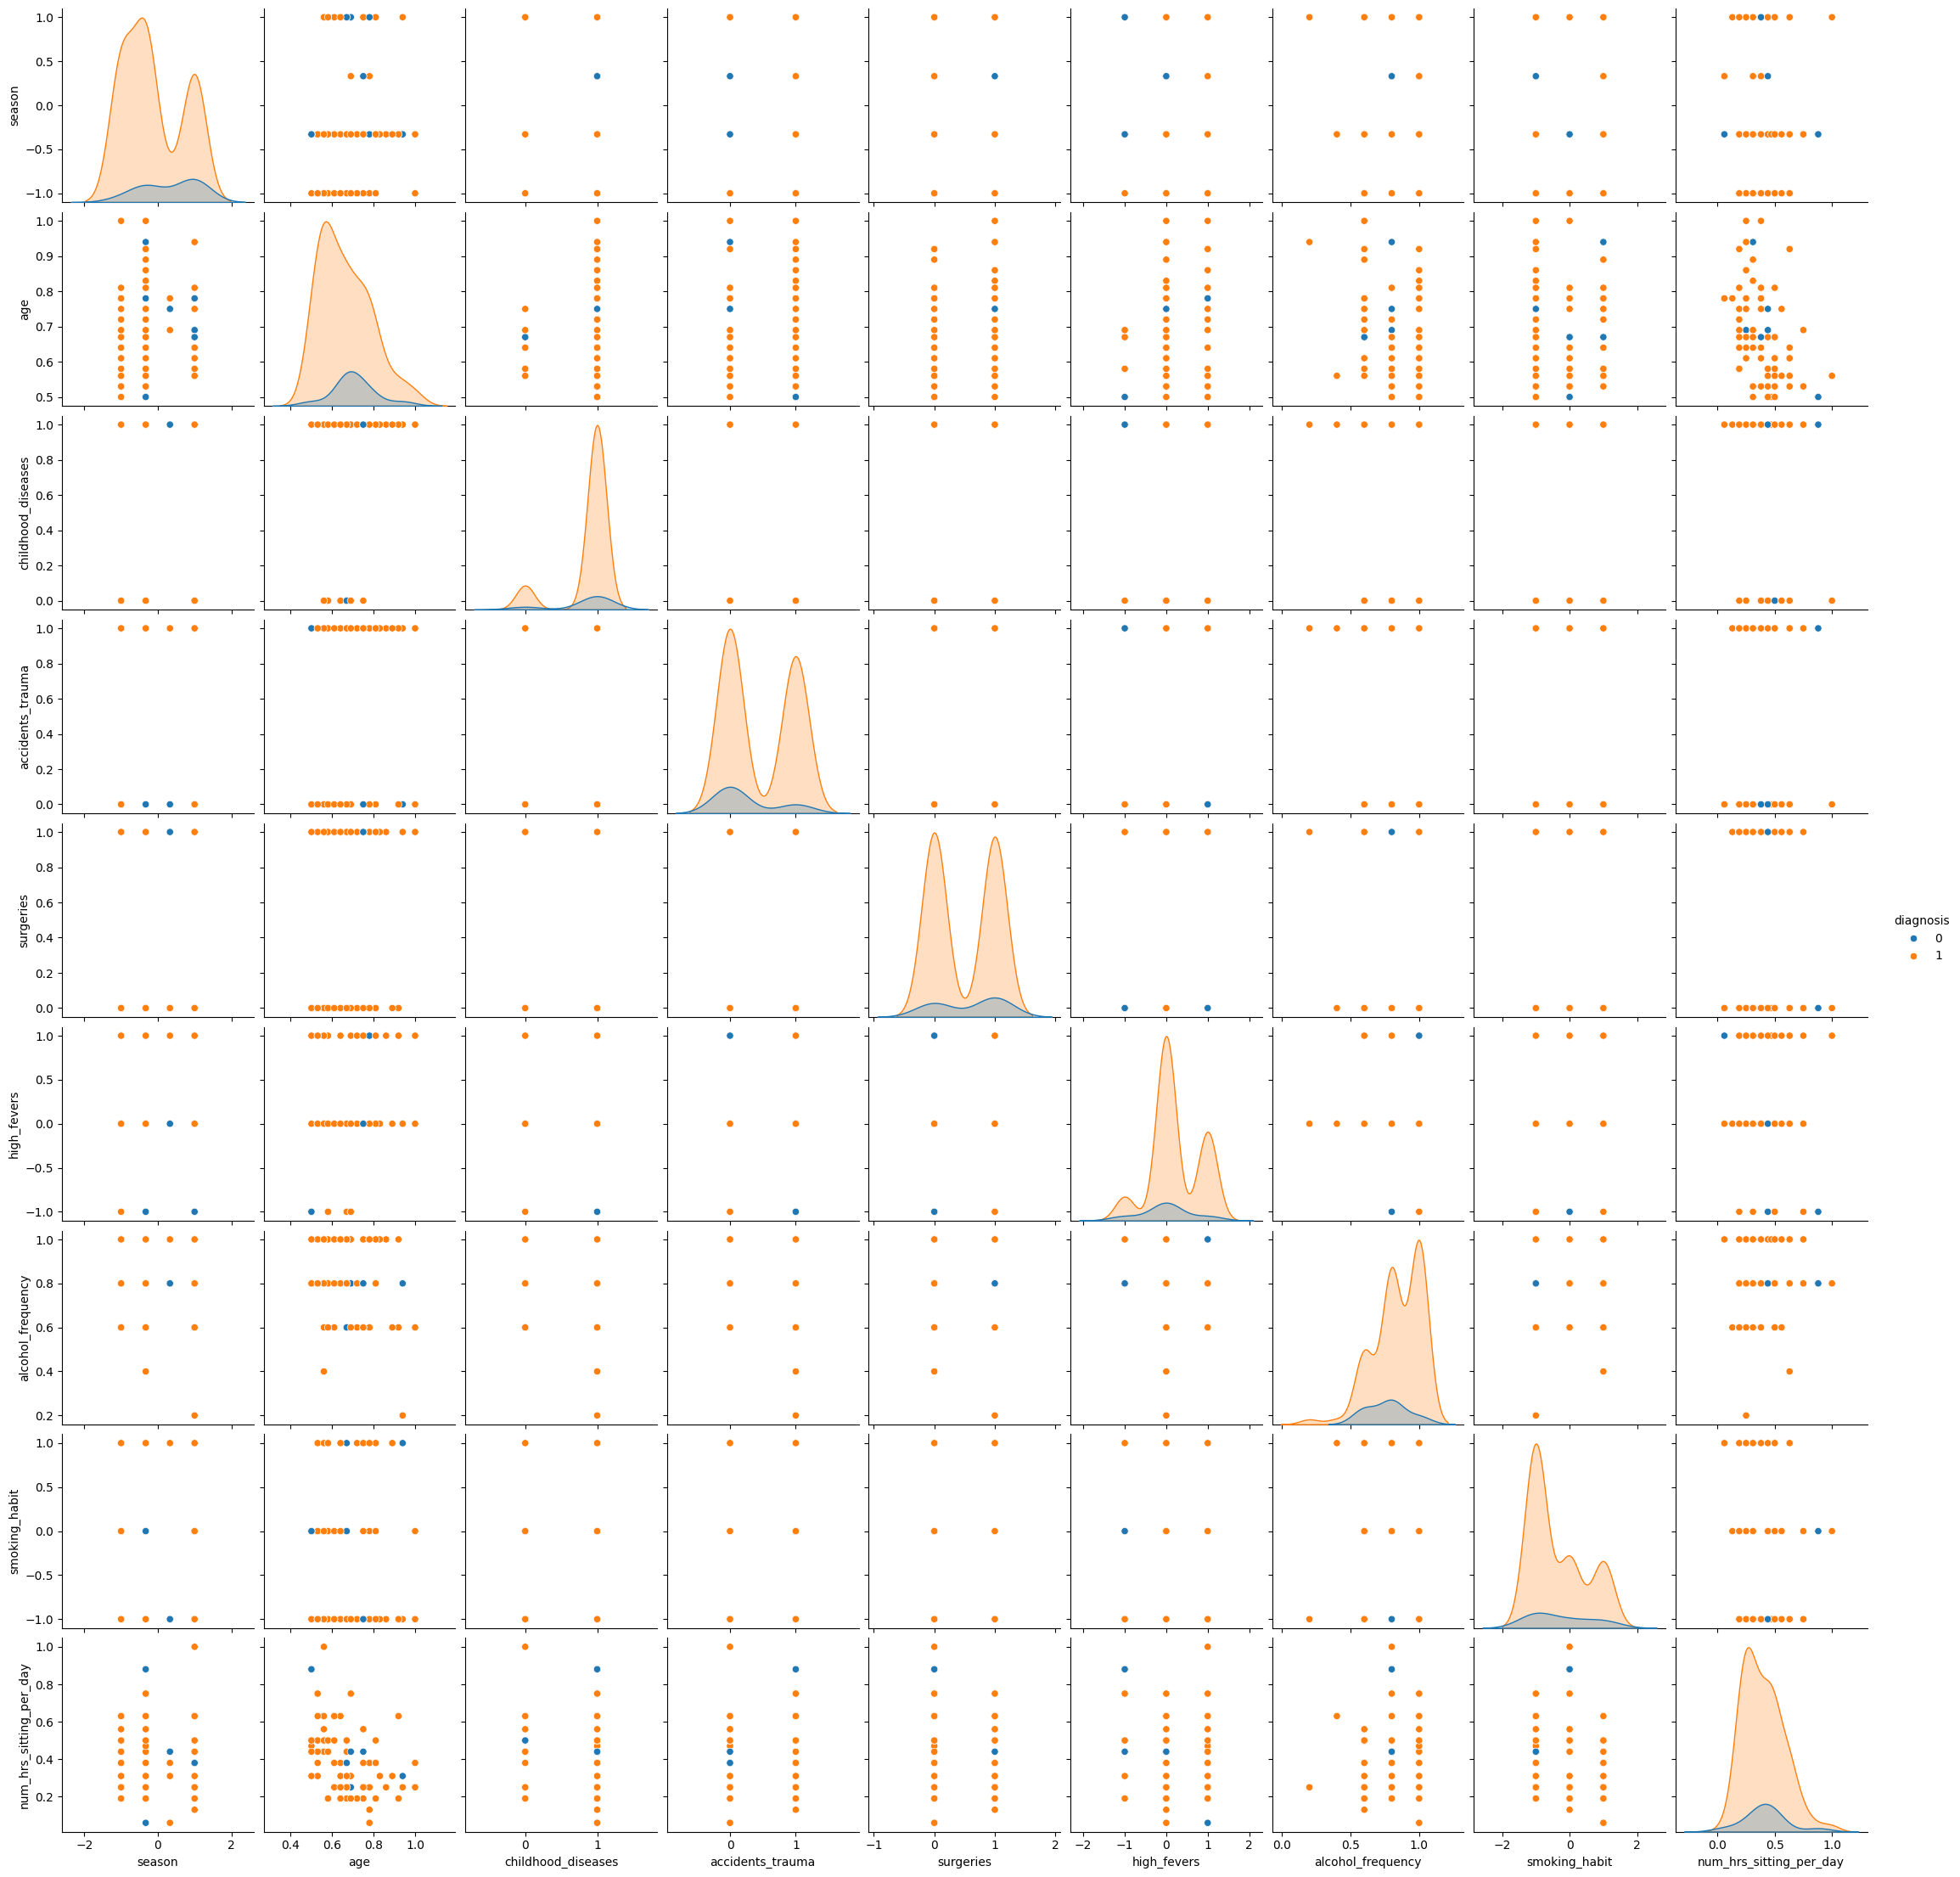

In [ ]:
sns.pairplot(df, hue="diagnosis", diag_kind="kde")

In [ ]:
df.sample(5)

,season,age,childhood_diseases,accidents_trauma,surgeries,high_fevers,alcohol_frequency,smoking_habit,num_hrs_sitting_per_day,diagnosis
75,-1.00,0.75,1,0,1,1,0.6,0,0.56,1
17,1.00,0.75,1,1,1,0,1.0,1,0.25,1
38,-1.00,0.69,1,0,0,0,1.0,-1,0.31,1
62,-1.00,0.56,1,0,0,1,1.0,-1,0.50,1
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,1


In [ ]:
df.isnull().sum()

season                     0
age                        0
childhood_diseases         0
accidents_trauma           0
surgeries                  0
high_fevers                0
alcohol_frequency          0
smoking_habit              0
num_hrs_sitting_per_day    0
diagnosis                  0
dtype: int64

Splitting the Data into Test and Train

In [ ]:
X = df.iloc[:,0:-1]
y = df[['diagnosis']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)

Building the Pipeline

In [ ]:
num_variables = ['season', 'age', 'childhood_diseases', 'accidents_trauma', 'surgeries', 'high_fevers', 'alcohol_frequency', 'smoking_habit', 'num_hrs_sitting_per_day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                  ('num', MinMaxScaler(), num_variables),
])

In [ ]:
pipeline = Pipeline([
                    ('trans', col_transform),
                    ('mlr', LogisticRegression(max_iter=1000)),
])

Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['season', 'age',
                                                   'childhood_diseases',
                                                   'accidents_trauma',
                                                   'surgeries', 'high_fevers',
                                                   'alcohol_frequency',
                                                   'smoking_habit',
                                                   'num_hrs_sitting_per_day'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)

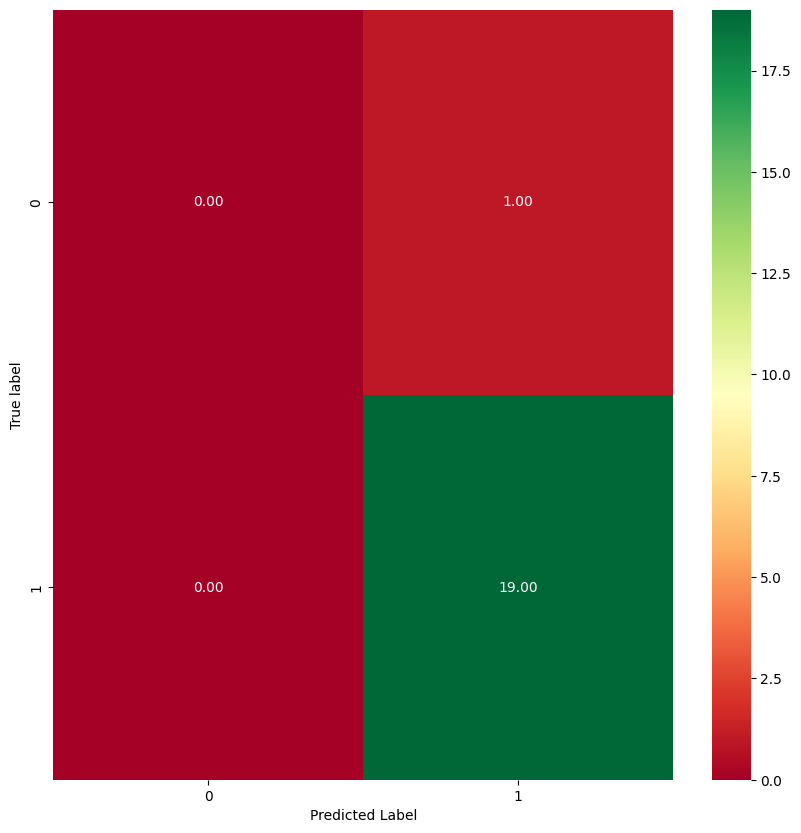

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.95
1.0
0.9743589743589743


0.7894736842105263


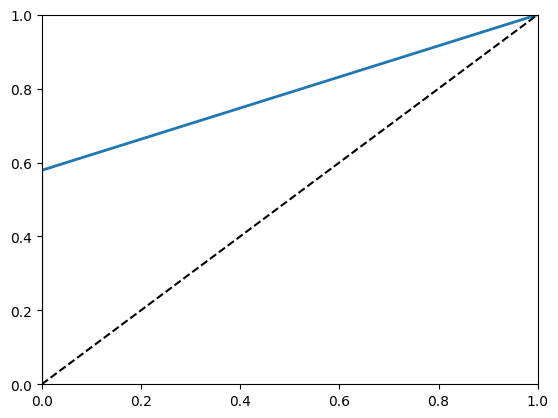

In [ ]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auc_score = auc(recall, precision)

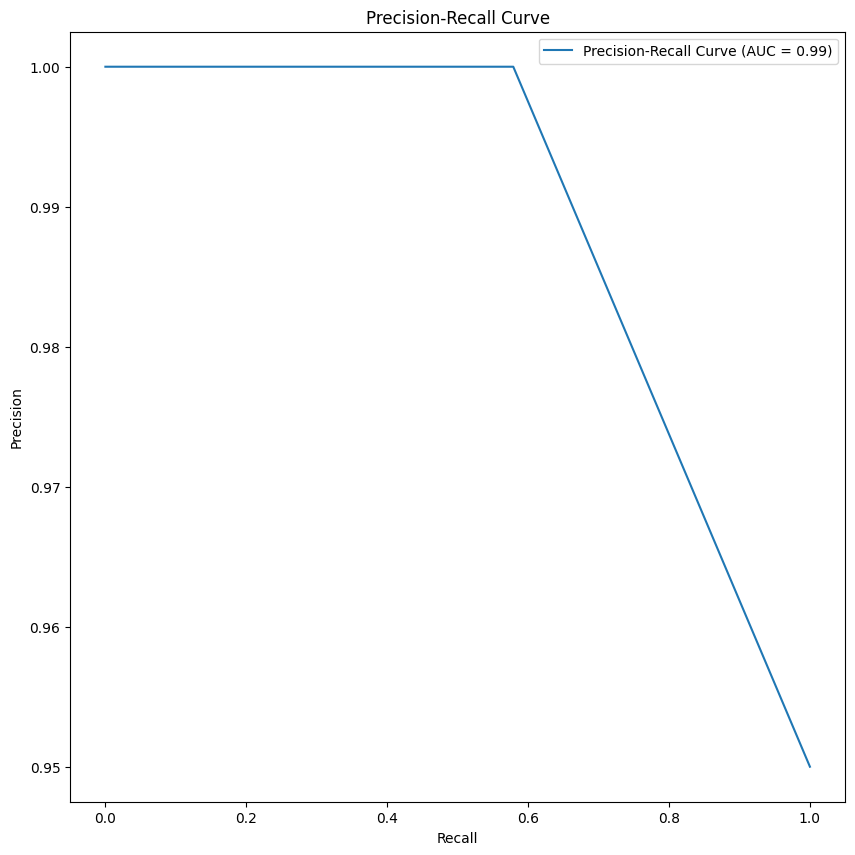

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

This model did well in predicting the normal fertility state of the male volunteers. The precision score is high at 0.95. The recall score is 1.0, which is the highest achievable value. The F1 score is 0.97. These are all very good scores.

The ROC curve is not great. There is not much of a curve and it does not hug the upper left corner of the graph. The AUC score is okay at 0.78.

The Precision-Recall curve is decent. It also does not show much of a curve. Though the AUC score is high at 0.99.

These values are a bit subjective because the classes are highly imbalanced.

# **KNN Model**

Building the Pipeline

In [ ]:
pipeline = Pipeline([
                    ('trans', col_transform),
                    ('knn', KNeighborsClassifier(n_neighbors=3)),
])

Executing the Model

In [ ]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['season', 'age',
                                                   'childhood_diseases',
                                                   'accidents_trauma',
                                                   'surgeries', 'high_fevers',
                                                   'alcohol_frequency',
                                                   'smoking_habit',
                                                   'num_hrs_sitting_per_day'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Evaluating the Model

In [ ]:
y_pred_knn = pipeline.predict(X_test)

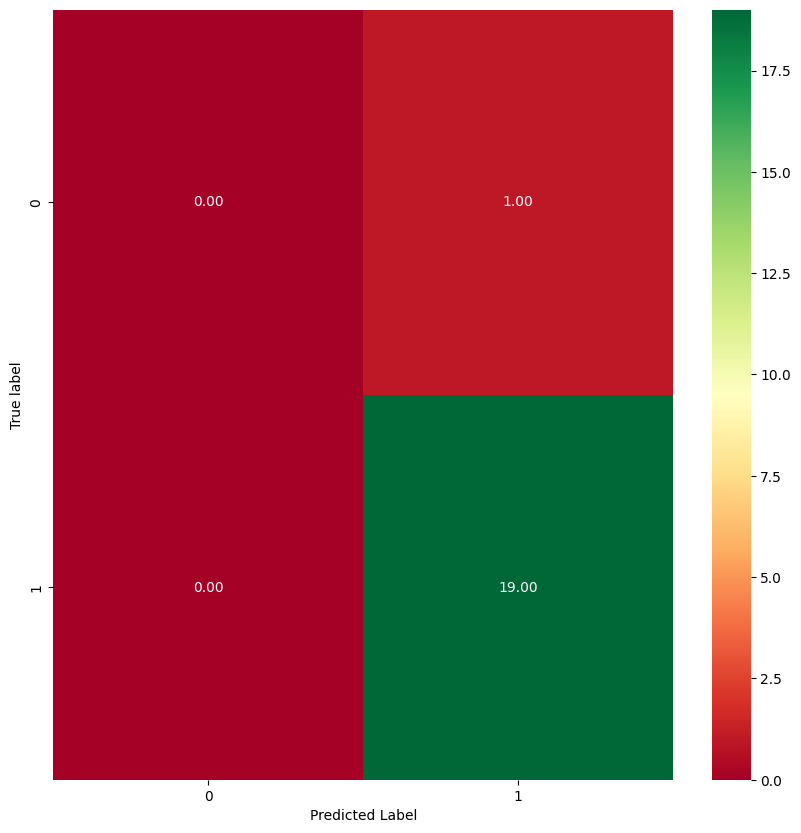

In [ ]:
plot_cm(y_test, y_pred_knn)

In [ ]:
print(precision_score(y_test,y_pred_knn))
print(recall_score(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))

0.95
1.0
0.9743589743589743


GridSearch

In [ ]:
parameters = {'knn__n_neighbors':[3,10,15,20],
              'knn__weights':['uniform', 'distance'],
              'knn__leaf_size':[10, 25]
}

In [ ]:
grid_pipeline = GridSearchCV(pipeline, param_grid=parameters, scoring='accuracy', cv=5)

In [ ]:
grid_pipeline

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['season',
                                                                          'age',
                                                                          'childhood_diseases',
                                                                          'accidents_trauma',
                                                                          'surgeries',
                                                                          'high_fevers',
                                                                          'alcohol_frequency',
                                                                          'smoking_habit',
                                                                          'num_hrs_sitting_per_day'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__leaf_size': [10, 25],
                         'knn__n_neighbors': [3, 10, 15, 20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_pipeline.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['season',
                                                                          'age',
                                                                          'childhood_diseases',
                                                                          'accidents_trauma',
                                                                          'surgeries',
                                                                          'high_fevers',
                                                                          'alcohol_frequency',
                                                                          'smoking_habit',
                                                                          'num_hrs_sitting_per_day'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__leaf_size': [10, 25],
                         'knn__n_neighbors': [3, 10, 15, 20],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_pipeline.best_params_

{'knn__leaf_size': 10, 'knn__n_neighbors': 15, 'knn__weights': 'uniform'}

In [ ]:
grid_pipeline.score(X_train, np.ravel(y_train))

0.8607594936708861

In [ ]:
y_pred_grid = grid_pipeline.predict(X_test)

In [ ]:
print(precision_score(y_test,y_pred_grid))

0.95


In [ ]:
print(recall_score(y_test,y_pred_grid))

1.0


In [ ]:
f1_score(y_test,y_pred_grid)

0.9743589743589743

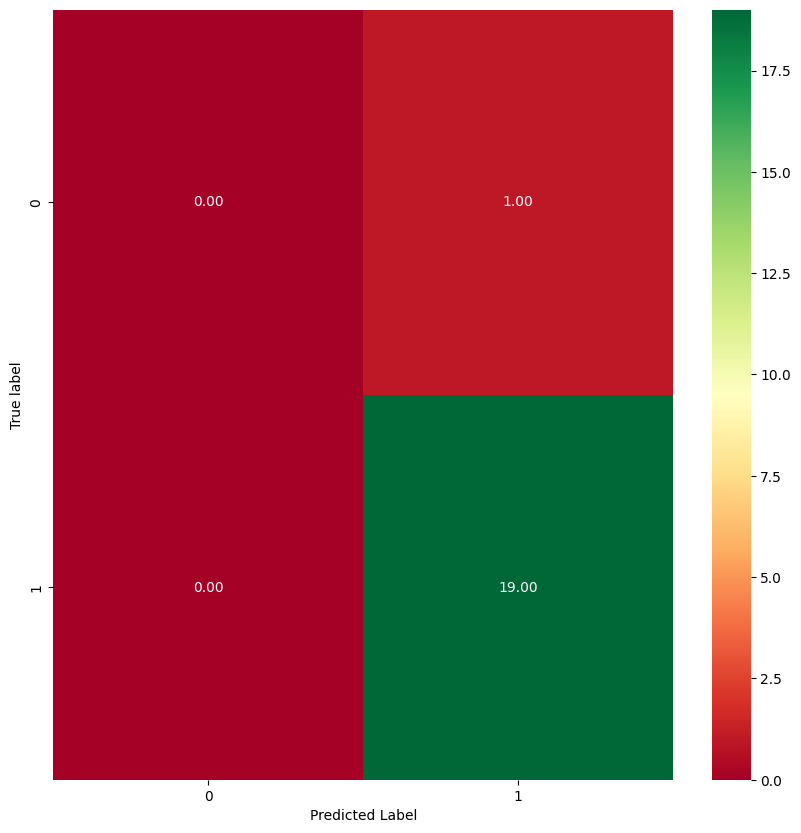

In [ ]:
plot_cm(y_test,y_pred_grid)

This model also did well in predicting the normal fertility status of male volunteers. The precision score is high at 0.95. The recall score is perfect at 1.0. The F1 score is 0.97.

I performed a GridSearch on this KNN model. The model found that the optimal parameters are a leaf size of 10, optimal n_neighbors at 15, and the optimal weights are uniform. The precision, recall, and F1 scores were already high to begin with using KNN so they did not improve much after running the GridSearch model.